## Gaussian Distribution

A distribution of data refers to the shape it has when you graph it, such as with a histogram.
The most commonly seen and therefore well-known distribution of continuous values is the bell
curve. It is known as the normal distribution, because it the distribution that a lot of data falls
into. It is also known as the Gaussian distribution, more formally, named for Carl Friedrich
Gauss. 

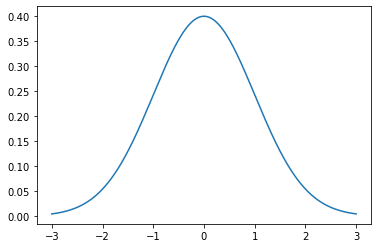

In [8]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis  = arange(-3 , 3 , 0.001)
# y-axis as gaussian distribution
y_axis = norm.pdf(x_axis , 0 , 1)
# plot the graph
pyplot.plot(x_axis , y_axis)
pyplot.show()

## Student's t- Distribution :-

It is a distribution that arises when attempting to estimate the mean of a normal distribution with different sized samples

formula:-

$ data = \frac{X - mean(X)}{\frac{S}{\sqrt{n}}}$

X = Obeservation from the Gaussian distribution
mean =  mean of the distribution
S = Standard deviation
n = total no of observation

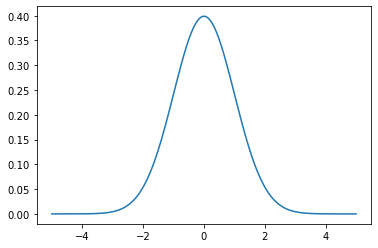

In [1]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1
pdf = t.pdf(sample_space , dof)
pyplot.plot(sample_space , pdf)
pyplot.show()

## Student's t-test:

The Student’s t-test is a statistical hypothesis test that two independent data samples known to
have a Gaussian distribution, have the same Gaussian distribution.

The assumption or null hypothesis of the test is that the means of two populations are equal.
A rejection of this hypothesis indicates that there is sufficient evidence that the means of the
populations are different, and in turn that the distributions are not equal.
- **Fail to Reject H0:** No difference between the sample means.
- **Reject H0:** Some difference between the sample means.

The Student’s t-test is available in Python via the **ttest_ind()** SciPy function. The function
takes two data samples as arguments and returns the calculated statistic and p-value. The
test assumes that both samples have the same variance, if this is not the case, a corrected
version of the test can be used by setting the equal var to False. We can demonstrate the
Student’s t-test on the test problem with the expectation that the test discovers the difference in
distribution between the two independent samples


In [2]:
# Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# creating two independent data set
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# Compare stats
stat , p = ttest_ind(data1 , data2)
print("Statistics : %.3f , and P : %.3f"%(stat,p))

alpha = 0.05
if p > alpha:
    print("same distribution (fail to reject the H0)")
else:
    print('Different Distribution (Reject the H0)')

Statistics : -2.262 , and P : 0.025
Different Distribution (Reject the H0)


## Analysis of variance test:-

There are sometimes situations where we may have multiple independent data samples. We can
perform the Student’s t-test pairwise on each combination of the data samples to get an idea of
which samples have different means. This can be onerous if we are only interested in whether
all samples have the same distribution or not. To answer this question, we can use the analysis
of variance test, or ANOVA for short. **ANOVA** is a statistical test that assumes that the mean
across 2 or more groups are equal. If the evidence suggests that this is not the case, the null
hypothesis is rejected and at least one data sample has a different distribution.

- **Fail to Reject H0:** All sample distributions are equal.
- **Reject H0:** One or more sample distributions are not equal.

Importantly, the test can only comment on whether all samples are the same or not; it
cannot quantify which samples differ or by how much.
The purpose of a one-way analysis of variance (one-way ANOVA) is to compare the
means of two or more groups (the independent variable) on one dependent variable
to see if the group means are significantly different from each other.


The test requires that the data samples are a Gaussian distribution, that the samples are
independent, and that all data samples have the same standard deviation. The ANOVA test
can be performed in Python using the **f_oneway()** SciPy function. The function takes two or
more data samples as arguments and returns the test statistic and f-value. We can modify
our test problem to have two samples with the same mean and a third sample with a slightly
different mean. We would then expect the test to discover that at least one sample has a
different distribution.

In [4]:
# Analysis of variance test
from numpy.random import randn
from numpy.random import seed
from scipy.stats import f_oneway
# seed the random generator
seed(1)
# creating 3 data sets
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# comparing sample
stat , p = f_oneway(data1 , data2 , data3)
print('Statistics : %.3f , P: %.3f'%(stat , p))
# interpret 
alpha = 0.05
if p > alpha:
    print(' Same Distribution ( Fail to reject the H0)')
else:
    print('Different Distribution (Reject the H0)')

Statistics : 3.655 , P: 0.027
Different Distribution (Reject the H0)
